In [1]:
!git clone https://github.com/congruiyS2023/GeneratedReviewsDetection.git

Cloning into 'GeneratedReviewsDetection'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 32 (delta 8), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 24.30 MiB | 39.38 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
import gzip
import shutil

# Initialize row counters for both input files
row_count1 = 0
row_count2 = 0

# Define the input and output file paths
input_file1= 'GeneratedReviewsDetection/Data/Luxury_Beauty_5.json.gz'
input_file2= 'GeneratedReviewsDetection/Data/Software_5.json.gz'

output_file = 'GeneratedReviewsDetection/Data/AmazonReviews.json'

# Unzip the file
with gzip.open(input_file1, 'rb') as f_in, open(output_file, 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
    row_count1 = sum(1 for line in f_in)


with gzip.open(input_file2, 'rb') as f_in2, open(output_file, 'ab') as f_out:
    shutil.copyfileobj(f_in2, f_out)
    row_count2 = sum(1 for line in f_in2)


output_row_count = sum(1 for line in open(output_file))

print("Output Row count: " + str(output_row_count))

Output Row count: 47083


In [3]:
import zipfile
import os

# Define the path to the zip file and the directory where you want to extract the contents
zip_file_path = 'GeneratedReviewsDetection/Data/AmazonReviews.json.zip'
extraction_directory = 'GeneratedReviewsDetection/Data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

In [13]:
# {
#   "overall": 5,
#   "verified": true,
#   "reviewTime": "01 5, 2018",
#   "reviewerID": "A2HOI48JK8838M",
#   "asin": "B00004U9V2",
#   "style": {
#     "Size:": " 0.9 oz."
#   },
#   "reviewerName": "DB",
#   "reviewText": "This handcream has a beautiful fragrance. It doesnt stay on or protect your hands through washing.  This size is quite small.",
#   "summary": "Beautiful Fragrance",
#   "unixReviewTime": 1515110400
# }

import pandas as pd
import json

# Specify the path to your JSON file
json_file_path = 'GeneratedReviewsDetection/Data/AmazonReviews.json'

# Initialize an empty list to store valid JSON data
valid_json_data = []

# Read the JSON file line by line and append valid JSON objects
with open(json_file_path, 'r') as json_file:
    for line in json_file:
        try:
            data = json.loads(line)
            valid_json_data.append(data)
        except json.JSONDecodeError as e:
            print(f"Failed to parse JSON on this line: {line}")

# Create a DataFrame from the valid JSON data
df = pd.DataFrame(valid_json_data)

# Convert the DataFrame to a CSV file
csv_file_path = 'GeneratedReviewsDetection/Data/AmazonReviews.csv'
df.to_csv(csv_file_path, index=False)

In [15]:
df = pd.read_csv(csv_file_path)

In [17]:
# Access the first few 'reviewText' fields
first_few_reviews = df['reviewText'].head()

# Display the first few 'reviewText' fields
print(first_few_reviews)

0    This handcream has a beautiful fragrance. It d...
1    wonderful hand lotion, for seriously dry skin,...
2    Best hand cream around.  Silky, thick, soaks i...
3                                             Thanks!!
4    Great hand lotion.  Soaks right in and leaves ...
Name: reviewText, dtype: object


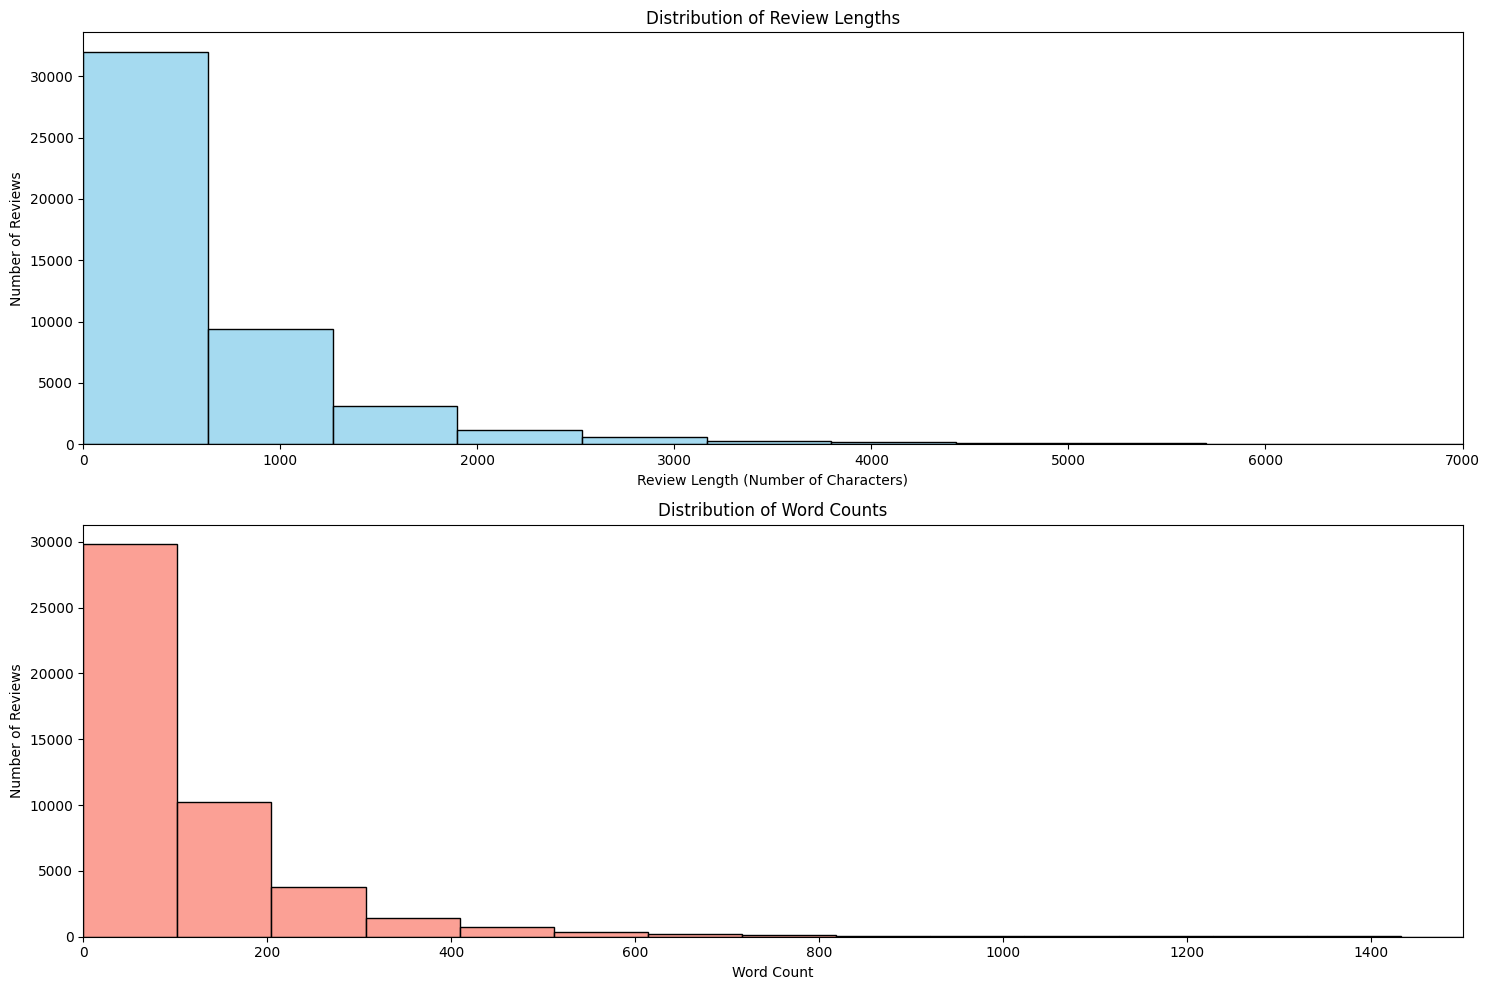

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating some features based on the 'review' column

df['reviewText'].fillna('', inplace=True)  # Replace missing values with an empty string

# 1. Review Length
df['review_length'] = df['reviewText'].apply(lambda x: len(str(x)))

# 2. Word Count
df['word_count'] = df['reviewText'].apply(lambda x: len(x.split()))

# Setting up the plots
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Distribution of Review Lengths
sns.histplot(df['review_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title("Distribution of Review Lengths")
ax[0].set_xlabel("Review Length (Number of Characters)")
ax[0].set_ylabel("Number of Reviews")
ax[0].set_xlim(0, 7000)  # Set custom maximum x-value for this plot

# Plot 2: Distribution of Word Counts
sns.histplot(df['word_count'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title("Distribution of Word Counts")
ax[1].set_xlabel("Word Count")
ax[1].set_ylabel("Number of Reviews")
ax[1].set_xlim(0, 1500)  # Set custom maximum x-value for this plot

plt.tight_layout()
plt.show()